# Task 1




Objective: Build a machine learning model to predict the
aggregate rating of a restaurant based on other features.

Steps:

Preprocess the dataset by handling missing values,
encoding categorical variables, and splitting the data
into training and testing sets.
Select a regression algorithm (e.g., linear regression,
decision tree regression) and train it on the training data.
Evaluate the model's performance using appropriate
regression metrics (e.g., mean squared error, R-squared)
on the testing data.
Interpret the model's results and analyze the most
influential features affecting restaurant ratings.

Task: Predict Restaurant Ratings

# ----------------------------------------------------------------------------------------------

Preprocess the dataset by handling missing values,
encoding categorical variables, and splitting the data
into training and testing sets.

In [1]:
import pandas as pd
import pandas as ps
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


In [2]:
# pd.set_option("display.max_rows",None)
# pd.set_option("display.max_columns",None)
df=pd.read_csv(r"H:\Sandeep\DATA SCIENCE\INTERNSHIP_Cognifyz\Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.insert(loc=0, column='Index', value=range(0, len(df)))
df.head()

,Index,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.shape

(9551, 22)

### Checking missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 9551 non-null   int64  
 1   Restaurant ID         9551 non-null   int64  
 2   Restaurant Name       9551 non-null   object 
 3   Country Code          9551 non-null   int64  
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

In [6]:
df['Cuisines'].isnull().sum()

9

### Visualizing the missing values

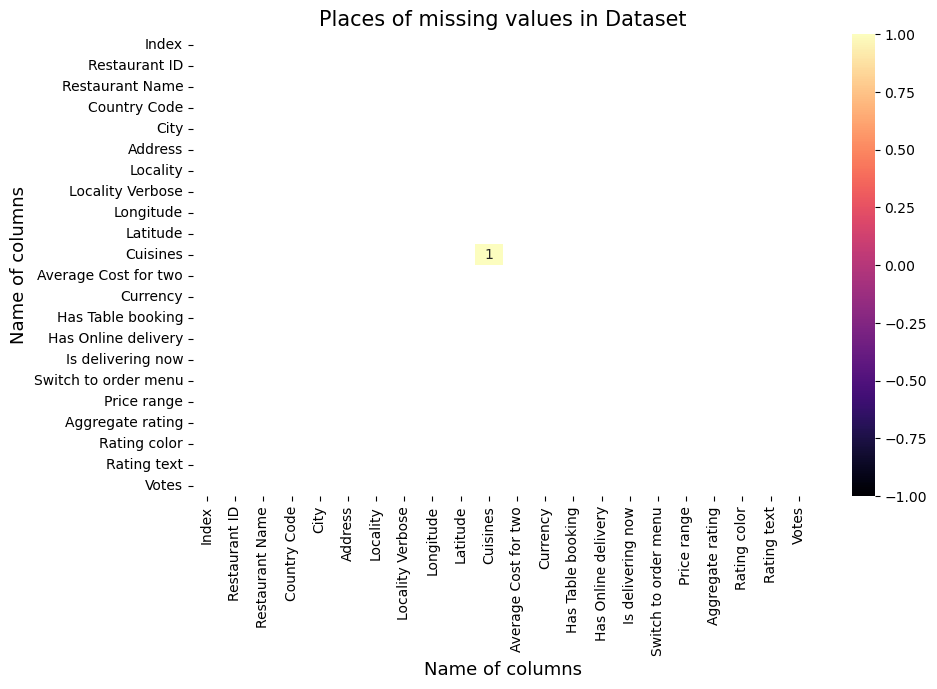

In [7]:
plt.figure(figsize = (10,6))
sns.heatmap(df.isnull().corr(), vmin=-1, annot= True,cmap='magma')
plt.xlabel('Name of columns', fontsize=13)
plt.ylabel('Name of columns', fontsize=13)
plt.title('Places of missing values in Dataset', fontsize=15)
plt.show()

In [8]:
df['Cuisines'].head()

0          French, Japanese, Desserts
1                            Japanese
2    Seafood, Asian, Filipino, Indian
3                     Japanese, Sushi
4                    Japanese, Korean
Name: Cuisines, dtype: object

In [9]:
df['Cuisines'].unique()


array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [10]:
df['Cuisines'].unique()


array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [11]:
df['Cuisines'].value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [12]:
df['Cuisines'].mode()[0]

'North Indian'

### filling null values with most repeated value in a column

In [13]:
df['Cuisines'].fillna(df['Cuisines'].mode()[0],inplace=True)

In [14]:
df['Cuisines'].isnull().sum()

0

In [15]:
df['Cuisines'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9551 entries, 0 to 9550
Series name: Cuisines
Non-Null Count  Dtype 
--------------  ----- 
9551 non-null   object
dtypes: object(1)
memory usage: 74.7+ KB


### Remove_special_characters

In [16]:
categorical_columns=df.select_dtypes(include='object')
categorical_columns

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
0,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent
1,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,Green,Very Good
3,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",Botswana Pula(P),No,No,No,No,Dark Green,Excellent
4,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,Naml۱ Gurme,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",Turkish,Turkish Lira(TL),No,No,No,No,Green,Very Good
9547,Ceviz A��ac۱,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul","World Cuisine, Patisserie, Cafe",Turkish Lira(TL),No,No,No,No,Green,Very Good
9548,Huqqa,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul","Italian, World Cuisine",Turkish Lira(TL),No,No,No,No,Yellow,Good
9549,A���k Kahve,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",Restaurant Cafe,Turkish Lira(TL),No,No,No,No,Green,Very Good


In [17]:
def remove_special_characters(text):
    text = str(text)
    return re.sub(r'[^\w\s]', '', text)

In [18]:
for col in categorical_columns:
    df[col] = df[col].apply(remove_special_characters)

### encoding categorical variables

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 9551 non-null   int64  
 1   Restaurant ID         9551 non-null   int64  
 2   Restaurant Name       9551 non-null   object 
 3   Country Code          9551 non-null   int64  
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9551 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 9551 non-null   int64  
 1   Restaurant ID         9551 non-null   int64  
 2   Restaurant Name       9551 non-null   object 
 3   Country Code          9551 non-null   int64  
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9551 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

In [21]:
df['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Bras_lia', 'Rio de Janeiro', 'So Paulo', 'Albany',
       'Armidale', 'Athens', 'Augusta', 'Balingup', 'Beechworth', 'Boise',
       'Cedar RapidsIowa City', 'ChathamKent', 'Clatskanie', 'Cochrane',
       'Columbus', 'Consort', 'Dalton', 'Davenport', 'Des Moines',
       'Dicky Beach', 'Dubuque', 'East Ballina', 'Fernley', 'Flaxton',
       'Forrest', 'Gainesville', 'Hepburn Springs', 'Huskisson',
       'Inverloch', 'Lakes Entrance', 'Lakeview', 'Lincoln', 'Lorn',
       'Macedon', 'Macon', 'Mayfield', 'Mc Millan', 'Middleton Beach',
       'Miller', 'Monroe', 'Montville', 'Ojo Caliente', 'Orlando',
       'Palm Cove', 'Paynesville', 'Penola', 'Pensacola',
       'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentham Eas

# percentage of Restaurant  based on Cuisines              

In [22]:
Cuisines_count=df['Cuisines'].value_counts()
Cuisines_count



Cuisines
North Indian                                         945
North Indian Chinese                                 511
Chinese                                              354
Fast Food                                            354
North Indian Mughlai                                 334
                                                    ... 
Bengali Fast Food                                      1
North Indian Rajasthani Asian                          1
Chinese Thai Malaysian Indonesian                      1
Bakery Desserts North Indian Bengali South Indian      1
Italian World Cuisine                                  1
Name: count, Length: 1825, dtype: int64

In [23]:
total_rest=df['Restaurant Name'].size
total_rest

9551

In [24]:
cuisine_per=(Cuisines_count/total_rest)*100
cuisine_per

Cuisines
North Indian                                         9.894252
North Indian Chinese                                 5.350225
Chinese                                              3.706418
Fast Food                                            3.706418
North Indian Mughlai                                 3.497016
                                                       ...   
Bengali Fast Food                                    0.010470
North Indian Rajasthani Asian                        0.010470
Chinese Thai Malaysian Indonesian                    0.010470
Bakery Desserts North Indian Bengali South Indian    0.010470
Italian World Cuisine                                0.010470
Name: count, Length: 1825, dtype: float64

In [25]:
df.head(2)

,Index,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0,6317637,Le Petit Souffle,162,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,121.027535,14.565443,...,Botswana PulaP,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,1,6304287,Izakaya Kikufuji,162,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,121.014101,14.553708,...,Botswana PulaP,Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [26]:
cat_To_encode=['Currency','City','Has Table booking','Has Online delivery','Is delivering now','Rating color','Rating text']


In [27]:
df[cat_To_encode]

,Currency,City,Has Table booking,Has Online delivery,Is delivering now,Rating color,Rating text
0,Botswana PulaP,Makati City,Yes,No,No,Dark Green,Excellent
1,Botswana PulaP,Makati City,Yes,No,No,Dark Green,Excellent
2,Botswana PulaP,Mandaluyong City,Yes,No,No,Green,Very Good
3,Botswana PulaP,Mandaluyong City,No,No,No,Dark Green,Excellent
4,Botswana PulaP,Mandaluyong City,Yes,No,No,Dark Green,Excellent
...,...,...,...,...,...,...,...
9546,Turkish LiraTL,stanbul,No,No,No,Green,Very Good
9547,Turkish LiraTL,stanbul,No,No,No,Green,Very Good
9548,Turkish LiraTL,stanbul,No,No,No,Yellow,Good
9549,Turkish LiraTL,stanbul,No,No,No,Green,Very Good


In [28]:
to_encodedf=df[cat_To_encode]
to_encodedf.head()

,Currency,City,Has Table booking,Has Online delivery,Is delivering now,Rating color,Rating text
0,Botswana PulaP,Makati City,Yes,No,No,Dark Green,Excellent
1,Botswana PulaP,Makati City,Yes,No,No,Dark Green,Excellent
2,Botswana PulaP,Mandaluyong City,Yes,No,No,Green,Very Good
3,Botswana PulaP,Mandaluyong City,No,No,No,Dark Green,Excellent
4,Botswana PulaP,Mandaluyong City,Yes,No,No,Dark Green,Excellent


In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in to_encodedf.columns:
    to_encodedf[column +'_encoded'] = labelencoder.fit_transform(to_encodedf[column])

In [30]:
to_encodedf.shape

(9551, 14)

In [31]:
to_encodedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Currency                     9551 non-null   object
 1   City                         9551 non-null   object
 2   Has Table booking            9551 non-null   object
 3   Has Online delivery          9551 non-null   object
 4   Is delivering now            9551 non-null   object
 5   Rating color                 9551 non-null   object
 6   Rating text                  9551 non-null   object
 7   Currency_encoded             9551 non-null   int32 
 8   City_encoded                 9551 non-null   int32 
 9   Has Table booking_encoded    9551 non-null   int32 
 10  Has Online delivery_encoded  9551 non-null   int32 
 11  Is delivering now_encoded    9551 non-null   int32 
 12  Rating color_encoded         9551 non-null   int32 
 13  Rating text_encoded          9551

In [32]:
to_drop=['Currency','City','Has Table booking','Has Online delivery','Is delivering now','Rating color','Rating text']
to_encodedf.drop(to_drop,axis=1,inplace=True)
to_encodedf

,Currency_encoded,City_encoded,Has Table booking_encoded,Has Online delivery_encoded,Is delivering now_encoded,Rating color_encoded,Rating text_encoded
0,0,73,1,0,0,0,1
1,0,73,1,0,0,0,1
2,0,75,1,0,0,1,5
3,0,75,0,0,0,0,1
4,0,75,1,0,0,0,1
...,...,...,...,...,...,...,...
9546,11,140,0,0,0,1,5
9547,11,140,0,0,0,1,5
9548,11,140,0,0,0,5,2
9549,11,140,0,0,0,1,5


In [33]:
dfn=to_encodedf

In [34]:
dfn

,Currency_encoded,City_encoded,Has Table booking_encoded,Has Online delivery_encoded,Is delivering now_encoded,Rating color_encoded,Rating text_encoded
0,0,73,1,0,0,0,1
1,0,73,1,0,0,0,1
2,0,75,1,0,0,1,5
3,0,75,0,0,0,0,1
4,0,75,1,0,0,0,1
...,...,...,...,...,...,...,...
9546,11,140,0,0,0,1,5
9547,11,140,0,0,0,1,5
9548,11,140,0,0,0,5,2
9549,11,140,0,0,0,1,5


In [35]:
from sklearn.model_selection import train_test_split
X=dfn
y=df['Aggregate rating']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
X_train.shape

(7640, 7)

In [37]:
X_test.shape

(1911, 7)

In [38]:
y_train.shape

(7640,)

### Select a regression algorithm (e.g., linear regression,decision tree regression) and train it on the training data.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble  import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

In [40]:
for model_name,model in models.items():
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    
    
    mse=mean_squared_error(y_test,y_predict)
    r_squared=r2_score(y_test,y_predict)
    rmse = np.sqrt(mse)

     # Print model performance metrics
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared: {r_squared}")
    print("----------------------------------")

Model: Linear Regression
Mean Squared Error: 1.7577887222404527
Root Mean Squared Error (RMSE): 1.3258162475397761
R-squared: 0.2601388518410185
----------------------------------
Model: Decision Tree
Mean Squared Error: 0.0330476837014688
Root Mean Squared Error (RMSE): 0.18179021893784275
R-squared: 0.9860900818750281
----------------------------------
Model: Random Forest
Mean Squared Error: 0.03252850062854995
Root Mean Squared Error (RMSE): 0.18035659297222809
R-squared: 0.9863086083563819
----------------------------------


In [41]:
dfn=dfn.join(y)

In [42]:
dfn.head()

,Currency_encoded,City_encoded,Has Table booking_encoded,Has Online delivery_encoded,Is delivering now_encoded,Rating color_encoded,Rating text_encoded,Aggregate rating
0,0,73,1,0,0,0,1,4.8
1,0,73,1,0,0,0,1,4.5
2,0,75,1,0,0,1,5,4.4
3,0,75,0,0,0,0,1,4.9
4,0,75,1,0,0,0,1,4.8


In [43]:
correlation_matrix = dfn.corr()
correlation_matrix

,Currency_encoded,City_encoded,Has Table booking_encoded,Has Online delivery_encoded,Is delivering now_encoded,Rating color_encoded,Rating text_encoded,Aggregate rating
Currency_encoded,1.000000,-0.071700,0.000640,0.006991,0.001458,-0.040430,0.014598,-0.006939
City_encoded,-0.071700,1.000000,-0.003762,0.012723,-0.014039,0.110941,-0.098961,-0.132139
Has Table booking_encoded,0.000640,-0.003762,1.000000,0.101224,-0.016816,-0.021365,0.044043,0.189998
Has Online delivery_encoded,0.006991,0.012723,0.101224,1.000000,0.101730,0.011477,-0.080937,0.225699
Is delivering now_encoded,0.001458,-0.014039,-0.016816,0.101730,1.000000,0.001886,-0.031970,0.019180
Rating color_encoded,-0.040430,0.110941,-0.021365,0.011477,0.001886,1.000000,0.163717,-0.367054
Rating text_encoded,0.014598,-0.098961,0.044043,-0.080937,-0.031970,0.163717,1.000000,-0.182662
Aggregate rating,-0.006939,-0.132139,0.189998,0.225699,0.019180,-0.367054,-0.182662,1.000000


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

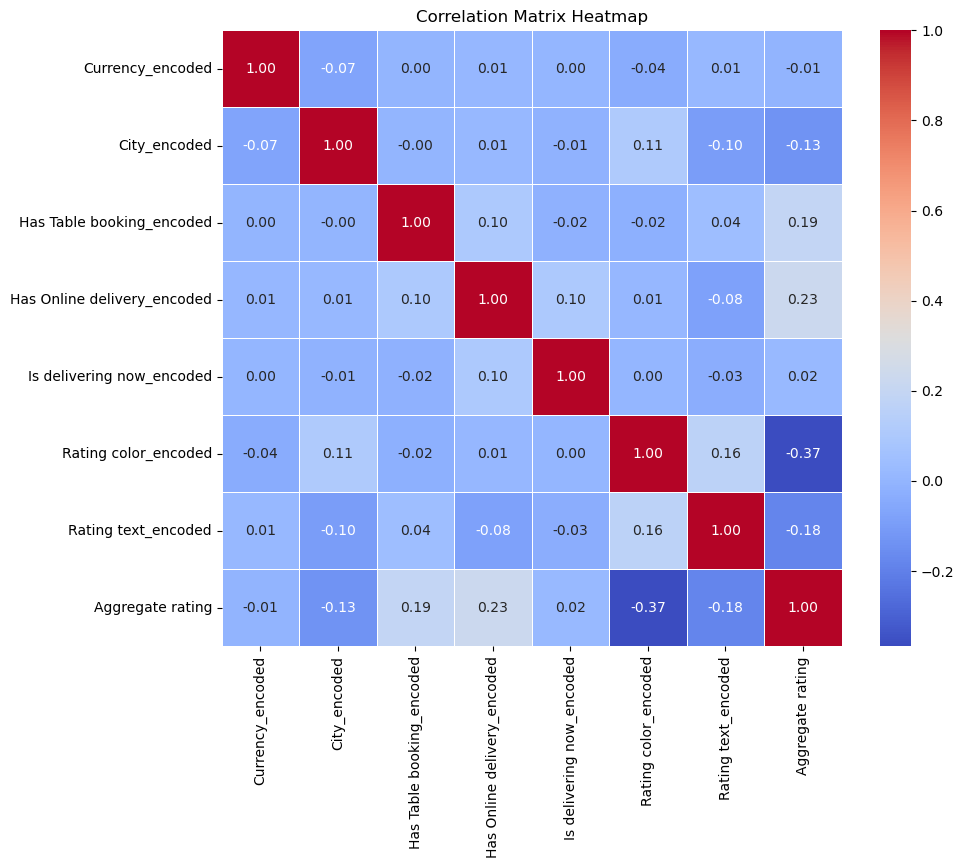

In [45]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# conclusion

### influential features affecting restaurant ratings.

Has Online delivery, Rating color this two coloumns are most influential features affecting restaurant ratings.

# TASK 2

### Restaurant recommendation

### Objective: Create a restaurant recommendationsystem based on user preferences.

Steps:
Preprocess the dataset by handling missing
values and encoding categorical variables.
Determine the criteria for restaurant
recommendations (e.g., cuisine preference,
price range).
Implement a content-based filtering
approach where users are recommended
restaurants similar to their preferred criteria.
Test the recommendation system by
providing sample user preferences and
evaluating the quality of recommendations.

# ---------------------------------------------------------------------------------

Determine the criteria for restaurant
recommendations (e.g., cuisine preference,
price range).

In [46]:
df.head()

,Index,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0,6317637,Le Petit Souffle,162,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,121.027535,14.565443,...,Botswana PulaP,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,1,6304287,Izakaya Kikufuji,162,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,121.014101,14.553708,...,Botswana PulaP,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,2,6300002,Heat Edsa ShangriLa,162,Mandaluyong City,Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...,Edsa ShangriLa Ortigas Mandaluyong City,Edsa ShangriLa Ortigas Mandaluyong City Mandal...,121.056831,14.581404,...,Botswana PulaP,Yes,No,No,No,4,4.4,Green,Very Good,270
3,3,6318506,Ooma,162,Mandaluyong City,Third Floor Mega Fashion Hall SM Megamall Orti...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.056475,14.585318,...,Botswana PulaP,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,4,6314302,Sambo Kojin,162,Mandaluyong City,Third Floor Mega Atrium SM Megamall Ortigas Ma...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.057508,14.584450,...,Botswana PulaP,Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [47]:
df['Restaurant Name'].head()

0        Le Petit Souffle
1        Izakaya Kikufuji
2    Heat  Edsa ShangriLa
3                    Ooma
4             Sambo Kojin
Name: Restaurant Name, dtype: object

# Restaurant Recommendations based on Cuisines

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_vector=TfidfVectorizer()
feature_vector=TFIDF_vector.fit_transform(df['Cuisines'])
print(feature_vector)

  (0, 45)	0.3949667034692667
  (0, 76)	0.5634560522880311
  (0, 57)	0.725616000575103
  (1, 76)	1.0
  (2, 69)	0.17158012803551756
  (2, 53)	0.7381286574949515
  (2, 8)	0.44714956317490323
  (2, 123)	0.4751669315098738
  (3, 135)	0.7432019257136803
  (3, 76)	0.6690671846798925
  (4, 82)	0.802891716420512
  (4, 76)	0.5961248960606528
  (5, 34)	1.0
  (6, 51)	0.7389769266751686
  (6, 8)	0.6737307339299006
  (7, 51)	0.44566297102225294
  (7, 53)	0.6707200485322964
  (7, 8)	0.40631422946197904
  (7, 123)	0.43177294923740955
  (8, 51)	0.7154550295636394
  (8, 69)	0.2502948988709071
  (8, 8)	0.6522856462250984
  (9, 53)	1.0
  (10, 94)	0.5382735269449205
  (10, 53)	0.8427702001081172
  :	:
  (9539, 45)	0.36866237226258364
  (9540, 14)	0.9438078132511708
  (9540, 56)	0.33049479821328953
  (9541, 119)	0.7019729917362704
  (9541, 143)	0.5732626157733562
  (9541, 27)	0.295561657733999
  (9541, 45)	0.3020715125711959
  (9542, 119)	0.9216381538686423
  (9542, 27)	0.3880504005069454
  (9543, 27)	1.0
 

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(feature_vector)
similarity

array([[1.        , 0.56345605, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.56345605, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.3880504 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.3880504 ,
        1.        ]])

In [50]:
list_of_Restaurant=df['Restaurant Name'].tolist()
list_of_Restaurant

['Le Petit Souffle',
 'Izakaya Kikufuji',
 'Heat  Edsa ShangriLa',
 'Ooma',
 'Sambo Kojin',
 'Din Tai Fung',
 'Buffet 101',
 'Vikings',
 'Spiral  Sofitel Philippine Plaza Manila',
 'Locavore',
 'Silantro FilMex',
 'Mad Marks Creamery  Good Eats',
 'Silantro FilMex',
 'Guevarras',
 'Sodam Korean Restaurant',
 'Cafe Arabelle',
 'Nonnas Pasta  Pizzeria',
 'Balay Dako',
 'Hobing Korean Dessert Cafe',
 'Wildflour Cafe  Bakery',
 'NIU by Vikings',
 'The Food Hall by Todd English',
 'Chez Michou',
 'Caf Daniel Briand',
 'Casa do Biscoito Mineiro',
 'Maori',
 'Pizza  Bessa',
 'Sushi Loko',
 'Beirute',
 'New Koto',
 'Sandubas Caf',
 'Villa Tevere',
 'Rovereto',
 'Buena Carne',
 'Taco Pep',
 'Coco Bambu',
 'Tayp',
 'Outback Steakhouse',
 'Manzu',
 'Coco Bambu',
 'Gero',
 'Brazilian American Burgers',
 'Pesqueiro Eco Gourmet',
 'Confeitaria Colombo',
 'Bibi',
 'Cervantes',
 'Amir',
 'TT Burger',
 'Braseiro da Gvea',
 'Balada Mix',
 'Garota de Ipanema',
 'Zaz Bistr Tropical',
 'Fil de Ouro',
 'DOC

In [51]:
Restaurant_name=input("Enter Restaurant name:")
Restaurant_name

Enter Restaurant name:Vikings


'Vikings'

In [52]:
import difflib
find_close_match=difflib.get_close_matches(Restaurant_name,list_of_Restaurant)
find_close_match

['Vikings', 'NIU by Vikings', 'Kings']

In [53]:
close_match=find_close_match[0]
close_match

'Vikings'

In [54]:
index_of_movies=df[df['Restaurant Name']==close_match]['Index'].values[0]
index_of_movies

7

In [55]:
df.head()

,Index,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0,6317637,Le Petit Souffle,162,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,121.027535,14.565443,...,Botswana PulaP,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,1,6304287,Izakaya Kikufuji,162,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,121.014101,14.553708,...,Botswana PulaP,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,2,6300002,Heat Edsa ShangriLa,162,Mandaluyong City,Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...,Edsa ShangriLa Ortigas Mandaluyong City,Edsa ShangriLa Ortigas Mandaluyong City Mandal...,121.056831,14.581404,...,Botswana PulaP,Yes,No,No,No,4,4.4,Green,Very Good,270
3,3,6318506,Ooma,162,Mandaluyong City,Third Floor Mega Fashion Hall SM Megamall Orti...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.056475,14.585318,...,Botswana PulaP,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,4,6314302,Sambo Kojin,162,Mandaluyong City,Third Floor Mega Atrium SM Megamall Ortigas Ma...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.057508,14.584450,...,Botswana PulaP,Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [56]:
similarity_score=list(enumerate(similarity[index_of_movies]))
similarity_score

[(0, 0.0),
 (1, 0.0),
 (2, 0.8819251465918725),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.6030810366805304),
 (7, 1.0000000000000002),
 (8, 0.5838847538432054),
 (9, 0.6707200485322965),
 (10, 0.5652628695180896),
 (11, 0.0),
 (12, 0.5652628695180896),
 (13, 0.6707200485322965),
 (14, 0.0),
 (15, 0.5132590615364754),
 (16, 0.0),
 (17, 0.6707200485322965),
 (18, 0.0),
 (19, 0.0),
 (20, 0.21649049670446968),
 (21, 0.4643297705334306),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.4317729492374096),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.19849737252022898),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.2558369998393809),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (6

In [57]:
len(similarity_score)


9551

In [58]:
sorted_similar_Restaurant=sorted(similarity_score,key=lambda x:x[1],reverse=True)
sorted_similar_Restaurant

[(7, 1.0000000000000002),
 (2, 0.8819251465918725),
 (434, 0.7417106015804507),
 (574, 0.6788322946546245),
 (9, 0.6707200485322965),
 (13, 0.6707200485322965),
 (17, 0.6707200485322965),
 (6659, 0.6675858435835859),
 (6, 0.6030810366805304),
 (1852, 0.6030810366805304),
 (6845, 0.6030810366805304),
 (1860, 0.5928904896829198),
 (8, 0.5838847538432054),
 (10, 0.5652628695180896),
 (12, 0.5652628695180896),
 (772, 0.5650758007443913),
 (1443, 0.5650758007443913),
 (7541, 0.5650758007443913),
 (5947, 0.563381090797164),
 (8427, 0.563381090797164),
 (3239, 0.5559566567816641),
 (468, 0.5262757304550134),
 (15, 0.5132590615364754),
 (7432, 0.5098431895779956),
 (2415, 0.4987673408468404),
 (3992, 0.4934707067460814),
 (1850, 0.4919065462763993),
 (21, 0.4643297705334306),
 (2545, 0.4565099146029603),
 (3116, 0.4565099146029603),
 (8047, 0.4565099146029603),
 (1215, 0.45486956619531715),
 (9313, 0.45180510403347585),
 (2428, 0.445662971022253),
 (4655, 0.445662971022253),
 (7430, 0.44566297

In [59]:
print("Restaurant Names suggested for you Based on Aggregate rating: \n")
recommended_restaurants_ = []


for restaurant in sorted_similar_Restaurant:
    index = restaurant[0]
    restaurant_name = df[df['Index'] == index]['Restaurant Name'].values[0]
    aggregate_rating = df[df['Index'] == index]['Aggregate rating'].values[0]
    Votes_ = df[df['Index'] == index]['Votes'].values[0]

    
    
    recommended_restaurants_.append((restaurant_name, aggregate_rating,Votes_))

# Sort by aggregate rating in descending order
recommended_restaurants_.sort(key=lambda x: (x[1],x[2]), reverse=True)

# Print top 10 recommendations
for i, (restaurant_name, aggregate_rating, Votes_) in enumerate(recommended_restaurants_[:10], 1):
    print(f"{i}. {restaurant_name} -------------------------------Rating: {aggregate_rating}---------------Votes_: {Votes_}")


Restaurant Names suggested for you Based on Aggregate rating: 

1. Barbeque Nation -------------------------------Rating: 4.9---------------Votes_: 5966
2. ABs  Absolute Barbecues -------------------------------Rating: 4.9---------------Votes_: 5434
3. Mirchi And Mime -------------------------------Rating: 4.9---------------Votes_: 3244
4. Naturals Ice Cream -------------------------------Rating: 4.9---------------Votes_: 2620
5. McGuires Irish Pub  Brewery -------------------------------Rating: 4.9---------------Votes_: 2238
6. Talaga Sampireun -------------------------------Rating: 4.9---------------Votes_: 2212
7. Indian Accent  The Manor -------------------------------Rating: 4.9---------------Votes_: 1934
8. Barbeque Nation -------------------------------Rating: 4.9---------------Votes_: 1753
9. Talaga Sampireun -------------------------------Rating: 4.9---------------Votes_: 1662
10. Talaga Sampireun -------------------------------Rating: 4.9---------------Votes_: 1640


In [60]:
recommended_restaurants_

[('Barbeque Nation', 4.9, 5966),
 ('ABs  Absolute Barbecues', 4.9, 5434),
 ('Mirchi And Mime', 4.9, 3244),
 ('Naturals Ice Cream', 4.9, 2620),
 ('McGuires Irish Pub  Brewery', 4.9, 2238),
 ('Talaga Sampireun', 4.9, 2212),
 ('Indian Accent  The Manor', 4.9, 1934),
 ('Barbeque Nation', 4.9, 1753),
 ('Talaga Sampireun', 4.9, 1662),
 ('Talaga Sampireun', 4.9, 1640),
 ('Pom Poms Teahouse and Sandwicheria', 4.9, 1457),
 ('Mazzaros Italian Market', 4.9, 1424),
 ('Mr Dunderbaks Biergarten and Marketplatz', 4.9, 1413),
 ('Tresind  Nassima Royal Hotel', 4.9, 1352),
 ('Mamas Fish House', 4.9, 1343),
 ('Yellow Dog Eats', 4.9, 1252),
 ('Silantro FilMex', 4.9, 1070),
 ('Grandson of Tunday Kababi', 4.9, 1057),
 ('Starbucks', 4.9, 1042),
 ('ABs  Absolute Barbecues', 4.9, 859),
 ('Shorts Burger and Shine', 4.9, 820),
 ('Barbeque Nation', 4.9, 774),
 ('Milse', 4.9, 754),
 ('Duck  Waffle', 4.9, 706),
 ('Atlanta Highway Seafood Market', 4.9, 681),
 ('ABs Absolute Barbecues', 4.9, 641),
 ('Spiral  Sofitel 

In [61]:
df['Cuisines']

0            French Japanese Desserts
1                            Japanese
2       Seafood Asian Filipino Indian
3                      Japanese Sushi
4                     Japanese Korean
                    ...              
9546                          Turkish
9547    World Cuisine Patisserie Cafe
9548            Italian World Cuisine
9549                  Restaurant Cafe
9550                             Cafe
Name: Cuisines, Length: 9551, dtype: object

In [62]:
df.columns

Index(['Index', 'Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# Restaurants based on Price Range and Aggregate Rating

In [63]:

# Filter restaurants based on Price Range and Aggregate Rating
price_threshold = 2  # Adjust the price range threshold as needed
rating_threshold = 4.0  # Adjust the rating threshold as needed

# Recommend restaurants with price range less than or equal to the threshold and aggregate rating greater than the threshold
recommended_restaurants = df[(df['Price range'] <= price_threshold) & (df['Aggregate rating'] >= rating_threshold)]
sorted_restaurants = recommended_restaurants.sort_values(by=['Aggregate rating','Price range'], ascending=False)


print(sorted_restaurants[['Restaurant Name', 'Price range', 'Aggregate rating']].head(50))

                             Restaurant Name  Price range  Aggregate rating
235                      Tantra Asian Bistro            2               4.9
250                                 The Cafe            2               4.9
304           Atlanta Highway Seafood Market            2               4.9
362       Pom Poms Teahouse and Sandwicheria            2               4.9
841                                  CakeBee            2               4.9
1381                             Caterspoint            2               4.9
9379                               Flat Iron            2               4.9
9388                                     Bao            2               4.9
9538                               Starbucks            2               4.9
175                  Shorts Burger and Shine            1               4.9
213                             Oakwood Cafe            1               4.9
324                  Ingleside Village Pizza            1               4.9
429         

In [64]:
df.head()

,Index,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0,6317637,Le Petit Souffle,162,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,121.027535,14.565443,...,Botswana PulaP,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,1,6304287,Izakaya Kikufuji,162,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,121.014101,14.553708,...,Botswana PulaP,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,2,6300002,Heat Edsa ShangriLa,162,Mandaluyong City,Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...,Edsa ShangriLa Ortigas Mandaluyong City,Edsa ShangriLa Ortigas Mandaluyong City Mandal...,121.056831,14.581404,...,Botswana PulaP,Yes,No,No,No,4,4.4,Green,Very Good,270
3,3,6318506,Ooma,162,Mandaluyong City,Third Floor Mega Fashion Hall SM Megamall Orti...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.056475,14.585318,...,Botswana PulaP,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,4,6314302,Sambo Kojin,162,Mandaluyong City,Third Floor Mega Atrium SM Megamall Ortigas Ma...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.057508,14.584450,...,Botswana PulaP,Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Implement a content-based filtering approach where users are recommended restaurants similar to their preferred criteria.

In [65]:
filtered_restaurants = df[(df['City'] == 'Makati City') & (df['Aggregate rating'] >= 4.0)]


# Print the filtered results
print(filtered_restaurants[[ 'Restaurant Name', 'City', 'Aggregate rating']])


    Restaurant Name         City  Aggregate rating
0  Le Petit Souffle  Makati City               4.8
1  Izakaya Kikufuji  Makati City               4.5


In [66]:
filtered_restaurants = df[(df['City'] == 'Kolkata') & (df['Aggregate rating'] >= 4.0)]

sorted_Aggregate_rating=filtered_restaurants.sort_values(by=['Aggregate rating'],ascending=False)
# Print the filtered results
print(sorted_Aggregate_rating[[ 'Restaurant Name', 'City', 'Aggregate rating']])



                     Restaurant Name     City  Aggregate rating
2409                 Barbeque Nation  Kolkata               4.9
2414                 Barbeque Nation  Kolkata               4.9
2400                     Spice Kraft  Kolkata               4.8
2398  Asia Kitchen by Mainland China  Kolkata               4.6
2407                India Restaurant  Kolkata               4.6
2402              6 Ballygunge Place  Kolkata               4.4
2404            Gabbars Bar  Kitchen  Kolkata               4.4
2413                 The Irish House  Kolkata               4.4
2412                       Peter Cat  Kolkata               4.3
2399                       Hoppipola  Kolkata               4.2
2403                    Mumbai Local  Kolkata               4.2
2406                 Santas Fantasea  Kolkata               4.2
2411                           BarBQ  Kolkata               4.2
2416             Sigree Global Grill  Kolkata               4.1
2405                     TGI Fridays  Ko

In [67]:
filtered_restaurants = df[(df['City'] == 'Hyderabad') & (df['Aggregate rating'] >= 4.0)]

sorted_Aggregate_rating=filtered_restaurants.sort_values(by=['Aggregate rating'],ascending=False)
# Print the filtered results
print(sorted_Aggregate_rating[[ 'Restaurant Name', 'City', 'Aggregate rating']])


                                     Restaurant Name       City  \
2301                         ABs  Absolute Barbecues  Hyderabad   
2307                         ABs  Absolute Barbecues  Hyderabad   
2308                                           Con_u  Hyderabad   
2302                                          Chilis  Hyderabad   
2315                                       Churrolto  Hyderabad   
2304                                          Chilis  Hyderabad   
2311                                    Olive Bistro  Hyderabad   
2300                                         Exotica  Hyderabad   
2306  Jonathans Kitchen  Holiday Inn Express  Suites  Hyderabad   
2309                                 Dock Forty Five  Hyderabad   
2310                                       Mocha Bar  Hyderabad   
2314                                Heart Cup Coffee  Hyderabad   
2312                                  Prost Brew Pub  Hyderabad   
2313                        United Kitchens of India  Hyderaba

In [68]:
df['Cuisines'].unique()


array(['French Japanese Desserts', 'Japanese',
       'Seafood Asian Filipino Indian', ..., 'Burger Izgara',
       'World Cuisine Patisserie Cafe', 'Italian World Cuisine'],
      dtype=object)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 9551 non-null   int64  
 1   Restaurant ID         9551 non-null   int64  
 2   Restaurant Name       9551 non-null   object 
 3   Country Code          9551 non-null   int64  
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9551 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

# recommendation of Restaurant Name for specific Cuisines

In [70]:
filtered_restaurants = df[(df['Cuisines'] == 'Indian') & (df['Aggregate rating'] >= 4.0)]
sorted_Aggregate_rating=filtered_restaurants.sort_values(by=['Aggregate rating','Votes'],ascending=[False, False])



# Print the filtered results
print(sorted_Aggregate_rating[['Restaurant Name', 'Cuisines', 'Aggregate rating','Votes']])


                   Restaurant Name Cuisines  Aggregate rating  Votes
597   Tresind  Nassima Royal Hotel   Indian               4.9   1352
590            Carnival By Tresind   Indian               4.9    322
581                          Tamba   Indian               4.7    201
9431                      Gymkhana   Indian               4.7    114
9419     Zaffran Dining Experience   Indian               4.6    348
9372            Mother Indias Cafe   Indian               4.4    279
9467        Geet Indian Restaurant   Indian               4.4    147
586                     Rasoi Ghar   Indian               4.3   1281
9426     Gokul Gujarati Restaurant   Indian               4.3    211
578               Indian By Nature   Indian               4.3    180
9413                        Akbars   Indian               4.2    383
170                 Taste of India   Indian               4.2    186
9350              Lasan Restaurant   Indian               4.1    213
174                   Exotic India

In [71]:
filtered_restaurants = df[(df['Cuisines'] == 'Japanese') & (df['Aggregate rating'] >= 4.0)]
sorted_Aggregate_rating=filtered_restaurants.sort_values(by=['Aggregate rating','Votes'],ascending=[False, False])



# Print the filtered results
print(sorted_Aggregate_rating[['Restaurant Name', 'Cuisines', 'Aggregate rating','Votes']])


               Restaurant Name  Cuisines  Aggregate rating  Votes
429              Marukame Udon  Japanese               4.9    602
54                Sushi Leblon  Japanese               4.6     25
1             Izakaya Kikufuji  Japanese               4.5    591
222               Soho Hibachi  Japanese               4.3    116
9289            3 Wise Monkeys  Japanese               4.2    395
3102  Fuji Japanese Restaurant  Japanese               4.0    312


In [72]:
filtered_restaurants = df[(df['Cuisines'] == 'Restaurant Cafe') & (df['Aggregate rating'] >= 4.0)]
sorted_Aggregate_rating=filtered_restaurants.sort_values(by=['Aggregate rating','Votes'],ascending=[False, False])



# Print the filtered results
print(sorted_Aggregate_rating[['Restaurant Name', 'Cuisines', 'Aggregate rating','Votes']])


     Restaurant Name         Cuisines  Aggregate rating  Votes
9549        Ak Kahve  Restaurant Cafe               4.0    901


In [73]:
filtered_restaurants = df[(df['Cuisines'] == 'Burger Izgara') & (df['Aggregate rating'] >= 4.0)]
sorted_Aggregate_rating=filtered_restaurants.sort_values(by=['Aggregate rating','Votes'],ascending=False)



# Print the filtered results
print(sorted_Aggregate_rating[['Restaurant Name', 'Cuisines', 'Aggregate rating','Votes']])


     Restaurant Name       Cuisines  Aggregate rating  Votes
9545        Baltazar  Burger Izgara               4.3    870


# recommendation of Restaurant Name based on Price Range

In [74]:
df['Cuisines'].unique()

array(['French Japanese Desserts', 'Japanese',
       'Seafood Asian Filipino Indian', ..., 'Burger Izgara',
       'World Cuisine Patisserie Cafe', 'Italian World Cuisine'],
      dtype=object)

In [75]:
filtered_restaurants = df[(df['Cuisines'] == 'Japanese') & (df['Aggregate rating'] >= 4.0) & (df['Price range'] <= 3)]
sorted_Aggregate_rating=filtered_restaurants.sort_values(by=['Aggregate rating','Votes','Price range'],ascending=[False, False, True])



# Print the filtered results
print(sorted_Aggregate_rating[['Restaurant Name', 'Cuisines', 'Aggregate rating','Votes','Price range']])





       Restaurant Name  Cuisines  Aggregate rating  Votes  Price range
429      Marukame Udon  Japanese               4.9    602            1
1     Izakaya Kikufuji  Japanese               4.5    591            3
222       Soho Hibachi  Japanese               4.3    116            1
9289    3 Wise Monkeys  Japanese               4.2    395            3


In [76]:
filtered_restaurants = df[(df['Cuisines'] == 'Burger Izgara') & (df['Aggregate rating'] >= 4.0) & (df['Price range'] <= 3)]
sorted_Aggregate_rating=filtered_restaurants.sort_values(by=['Aggregate rating','Votes','Price range'],ascending=[False, False, True])



# Print the filtered results
print(sorted_Aggregate_rating[['Restaurant Name', 'Cuisines', 'Aggregate rating','Votes','Price range']])





     Restaurant Name       Cuisines  Aggregate rating  Votes  Price range
9545        Baltazar  Burger Izgara               4.3    870            3


In [77]:
filtered_restaurants = df[(df['Cuisines'] == 'Indian') & (df['Aggregate rating'] >= 4.0) & (df['Price range'] <= 3)]
sorted_Aggregate_rating=filtered_restaurants.sort_values(by=['Aggregate rating','Votes','Price range'],ascending=[False, False, True])



# Print the filtered results
print(sorted_Aggregate_rating[['Restaurant Name', 'Cuisines', 'Aggregate rating','Votes','Price range']])





                Restaurant Name Cuisines  Aggregate rating  Votes  Price range
9372         Mother Indias Cafe   Indian               4.4    279            2
586                  Rasoi Ghar   Indian               4.3   1281            2
9426  Gokul Gujarati Restaurant   Indian               4.3    211            2
578            Indian By Nature   Indian               4.3    180            3
9413                     Akbars   Indian               4.2    383            2
170              Taste of India   Indian               4.2    186            2
174                Exotic India   Indian               4.1    160            2
137            The Taj of India   Indian               4.0    227            2


# recommendation of Restaurant Name weather it will delivery food online

In [78]:
delivery_food_online=df[(df['Restaurant Name']=='Exotica')&(df['Has Online delivery']=='Yes')]
delivery_food_online[['Restaurant Name','Has Online delivery']]

,Restaurant Name,Has Online delivery
2300,Exotica,Yes


In [79]:
delivery_food_online=df[(df['Restaurant Name']=='ABs  Absolute Barbecues')&(df['Has Online delivery']=='Yes')]
delivery_food_online[['Restaurant Name','Has Online delivery']]

,Restaurant Name,Has Online delivery


In [80]:
delivery_food_online=df[(df['Restaurant Name']=='Olive Bistro')&(df['Has Online delivery']=='Yes')]
delivery_food_online[['Restaurant Name','Has Online delivery']]

,Restaurant Name,Has Online delivery
2311,Olive Bistro,Yes


# recommendation of Restaurant Name weather it Has Table booking

In [81]:
delivery_food_online=df[(df['Restaurant Name']=='Le Petit Souffle')&(df['Has Table booking']=='Yes')]
delivery_food_online[['Restaurant Name','Has Table booking']]

,Restaurant Name,Has Table booking
0,Le Petit Souffle,Yes


In [82]:
delivery_food_online=df[(df['Restaurant Name']=='Izakaya Kikufuji')&(df['Has Table booking']=='Yes')]
delivery_food_online[['Restaurant Name','Has Table booking']]

,Restaurant Name,Has Table booking
1,Izakaya Kikufuji,Yes


In [83]:
delivery_food_online=df[(df['Restaurant Name']=='Sambo Kojin')&(df['Has Table booking']=='Yes')]
delivery_food_online[['Restaurant Name','Has Table booking']]

,Restaurant Name,Has Table booking
4,Sambo Kojin,Yes


# recommendation of Restaurant Name on  bases of country code

In [84]:
filtered_restaurants = df[(df['Country Code'] ==162 ) & (df['Aggregate rating'] >= 4.0)]

sorted_Aggregate_rating=filtered_restaurants.sort_values(by=['Aggregate rating','Votes'],ascending=[False, False])
# Print the filtered results
print(sorted_Aggregate_rating[[ 'Restaurant Name', 'Address', 'Aggregate rating','Votes']])


                            Restaurant Name  \
10                          Silantro FilMex   
8   Spiral  Sofitel Philippine Plaza Manila   
3                                      Ooma   
9                                  Locavore   
0                          Le Petit Souffle   
12                          Silantro FilMex   
4                               Sambo Kojin   
20                           NIU by Vikings   
21            The Food Hall by Todd English   
1                          Izakaya Kikufuji   
17                               Balay Dako   
18               Hobing Korean Dessert Cafe   
19                   Wildflour Cafe  Bakery   
5                              Din Tai Fung   
2                      Heat  Edsa ShangriLa   
14                  Sodam Korean Restaurant   
7                                   Vikings   
11            Mad Marks Creamery  Good Eats   
13                                Guevarras   
6                                Buffet 101   
16           

In [85]:
filtered_restaurants = df[(df['Country Code'] ==1 ) & (df['Aggregate rating'] >= 4.0)]

sorted_Aggregate_rating=filtered_restaurants.sort_values(by=['Aggregate rating','Votes'],ascending=[False, False])
# Print the filtered results
print(sorted_Aggregate_rating[[ 'Restaurant Name', 'Address', 'Aggregate rating','Votes']])


               Restaurant Name  \
2414           Barbeque Nation   
2307   ABs  Absolute Barbecues   
2495           Mirchi And Mime   
3013        Naturals Ice Cream   
3601  Indian Accent  The Manor   
...                        ...   
2164              Me Kong Bowl   
2361                    Liquid   
7193           Biryani By Kilo   
1495          The Diet Kitchen   
5896                 Bistro 57   

                                                Address  Aggregate rating  \
2414   K1 RDB Boulevard Block EP  GP Sector 5 Salt Lake               4.9   
2307  Plot 483 4th Floor Pemmasani Complex Bajaj Ele...               4.9   
2495  Transocean House Lake Boulevard Hiranandani Bu...               4.9   
3013          L8 Outer Circle Connaught Place New Delhi               4.9   
3601              The Manor 77 Friends Colony New Delhi               4.9   
...                                                 ...               ...   
2164   G229 Sushant Shopping Arcade Sushant Lok Gurg

In [86]:
filtered_restaurants = df[(df['Country Code'] ==30 ) & (df['Aggregate rating'] >= 4.0)]

sorted_Aggregate_rating=filtered_restaurants.sort_values(by=['Aggregate rating','Votes'],ascending=[False, False])
# Print the filtered results
print(sorted_Aggregate_rating[[ 'Restaurant Name', 'Address', 'Aggregate rating','Votes']])


                  Restaurant Name  \
50              Garota de Ipanema   
48               Braseiro da Gvea   
39                     Coco Bambu   
66             Skye  Hotel Unique   
43            Confeitaria Colombo   
47                      TT Burger   
59                      Apraz_vel   
44                           Bibi   
80                         Veloso   
67                Les 3 Brasseurs   
54                   Sushi Leblon   
60              Aconchego Carioca   
49                     Balada Mix   
51             Zaz Bistr Tropical   
62       Cantina Famiglia Mancini   
45                      Cervantes   
76                  Terra_o Itlia   
79                 Esquina Mocot_   
63  Templo da Carne  Marcos Bassi   
55                 Talho Capixaba   
74                          Meats   
75                        Paribar   
72            A Figueira Rubaiyat   
34                       Taco Pep   
52                    Fil de Ouro   
61              Garota de Ipanema   
3

# recommendation of Restaurant Name on bases of Is delivering now

In [87]:
delivery_food_online=df[(df['Restaurant Name']=='The Night Factory')&(df['Is delivering now']=='Yes')]
delivery_food_online[['Restaurant Name','Is delivering now']]

,Restaurant Name,Is delivering now
787,The Night Factory,Yes


In [88]:
delivery_food_online=df[(df['Restaurant Name']=='Grandmas Kitchen')&(df['Is delivering now']=='Yes')]
delivery_food_online[['Restaurant Name','Is delivering now']]

,Restaurant Name,Is delivering now
1356,Grandmas Kitchen,Yes


In [89]:
delivery_food_online=df[(df['Restaurant Name']=='Cake 24x7')&(df['Is delivering now']=='Yes')]
delivery_food_online[['Restaurant Name','Is delivering now']]

,Restaurant Name,Is delivering now
1343,Cake 24x7,Yes
2204,Cake 24x7,Yes


In [90]:
df['Is delivering now'].unique()

array(['No', 'Yes'], dtype=object)

In [91]:
df.head(2)

,Index,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0,6317637,Le Petit Souffle,162,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,121.027535,14.565443,...,Botswana PulaP,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,1,6304287,Izakaya Kikufuji,162,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,121.014101,14.553708,...,Botswana PulaP,Yes,No,No,No,3,4.5,Dark Green,Excellent,591


# Test the recommendation system by providing sample user preferences and evaluating the quality of recommendations. by precision, recall, f1 score

In [93]:
# user_preferences = [restaurant[0] for restaurant in recommended_restaurants]
recommended_restaurants_
# user_preferences

# user_preferences=[i[0]    for i in recommended_restaurants]
# user_preferences[:10]


user_preferences_=[i[0]    for i in recommended_restaurants_]
user_preferences_[:10]

['Barbeque Nation',
 'ABs  Absolute Barbecues',
 'Mirchi And Mime',
 'Naturals Ice Cream',
 'McGuires Irish Pub  Brewery',
 'Talaga Sampireun',
 'Indian Accent  The Manor',
 'Barbeque Nation',
 'Talaga Sampireun',
 'Talaga Sampireun']

In [94]:
relevant_items = set(user_preferences_[:7])

# Step 3: Evaluate Recommendations
top_10_recommendations = [restaurant[0] for restaurant in recommended_restaurants_[:10]]
relevant_items_recommended = set(top_10_recommendations).intersection(relevant_items)

# Calculate Precision
precision = len(relevant_items_recommended) / len(top_10_recommendations)

# Calculate Recall
recall = len(relevant_items_recommended) / len(relevant_items)

# Calculate F1 Score
if precision + recall > 0:
    f1_score = 2 * (precision * recall) / (precision + recall)
else:
    f1_score = 0

print("\nEvaluation Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Evaluation Metrics:
Precision: 0.70
Recall: 1.00
F1 Score: 0.82


# Conclusion for TASK 2
In this project, I developed a restaurant recommendation system utilizing a content-based filtering approach tailored to user preferences. By leveraging cosine similarity based on the index of cuisines, the system effectively identifies restaurants that align closely with users' chosen criteria. Additionally, the model filters recommendations based on specific cuisines, ensuring relevance to user tastes.

The effectiveness of the recommendation system was assessed through evaluation metrics, yielding a Precision of 0.70, Recall of 1.00, and an F1 Score of 0.82. These results indicate a strong ability to identify relevant recommendations while maintaining a high rate of true positives, underscoring the system's utility in delivering personalized dining suggestions. This successful implementation lays the groundwork for further enhancements, such as incorporating additional user data or expanding the feature set for even more refined recommendations.

# Task 3

# Objective: Develop a machine learning model to classify restaurants based on their cuisines.

Steps:

Preprocess the dataset by handling missing values
and encoding categorical variables.
Split the data into training and testing sets.
Select a classification algorithm (e.g., logistic
regression, random forest) and train it on the
training data.
Evaluate the model's performance using
appropriate classification metrics (e.g., accuracy,
precision, recall) on the testing data.
Analyze the model's performance across different
cuisines and identify any challenges or biases.

In [95]:
df['Cuisines'].nunique()

1825

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 9551 non-null   int64  
 1   Restaurant ID         9551 non-null   int64  
 2   Restaurant Name       9551 non-null   object 
 3   Country Code          9551 non-null   int64  
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9551 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

In [97]:
float_columns = df.select_dtypes(include=['float']).columns
df[float_columns] = df[float_columns].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Index                 9551 non-null   int64 
 1   Restaurant ID         9551 non-null   int64 
 2   Restaurant Name       9551 non-null   object
 3   Country Code          9551 non-null   int64 
 4   City                  9551 non-null   object
 5   Address               9551 non-null   object
 6   Locality              9551 non-null   object
 7   Locality Verbose      9551 non-null   object
 8   Longitude             9551 non-null   int32 
 9   Latitude              9551 non-null   int32 
 10  Cuisines              9551 non-null   object
 11  Average Cost for two  9551 non-null   int64 
 12  Currency              9551 non-null   object
 13  Has Table booking     9551 non-null   object
 14  Has Online delivery   9551 non-null   object
 15  Is delivering now     9551 non-null   

In [98]:
df.columns

Index(['Index', 'Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [99]:
df['Restaurant ID'].nunique()

9551

In [100]:
df_new=df[[ 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes','Restaurant Name']]
df_new

,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name
0,162,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,121,14,French Japanese Desserts,1100,Botswana PulaP,Yes,No,No,No,3,4,Dark Green,Excellent,314,Le Petit Souffle
1,162,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,121,14,Japanese,1200,Botswana PulaP,Yes,No,No,No,3,4,Dark Green,Excellent,591,Izakaya Kikufuji
2,162,Mandaluyong City,Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...,Edsa ShangriLa Ortigas Mandaluyong City,Edsa ShangriLa Ortigas Mandaluyong City Mandal...,121,14,Seafood Asian Filipino Indian,4000,Botswana PulaP,Yes,No,No,No,4,4,Green,Very Good,270,Heat Edsa ShangriLa
3,162,Mandaluyong City,Third Floor Mega Fashion Hall SM Megamall Orti...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121,14,Japanese Sushi,1500,Botswana PulaP,No,No,No,No,4,4,Dark Green,Excellent,365,Ooma
4,162,Mandaluyong City,Third Floor Mega Atrium SM Megamall Ortigas Ma...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121,14,Japanese Korean,1500,Botswana PulaP,Yes,No,No,No,4,4,Dark Green,Excellent,229,Sambo Kojin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,208,stanbul,Kemanke Karamustafa Paa Mahallesi R۱ht۱m Cadde...,Karak_y,Karak_y stanbul,28,41,Turkish,80,Turkish LiraTL,No,No,No,No,3,4,Green,Very Good,788,Naml۱ Gurme
9547,208,stanbul,Kouyolu Mahallesi Muhittin st_nda Caddesi No 8...,Kouyolu,Kouyolu stanbul,29,41,World Cuisine Patisserie Cafe,105,Turkish LiraTL,No,No,No,No,3,4,Green,Very Good,1034,Ceviz Aac۱
9548,208,stanbul,Kuru_eme Mahallesi Muallim Naci Caddesi No 56 ...,Kuru_eme,Kuru_eme stanbul,29,41,Italian World Cuisine,170,Turkish LiraTL,No,No,No,No,4,3,Yellow,Good,661,Huqqa
9549,208,stanbul,Kuru_eme Mahallesi Muallim Naci Caddesi No 64B...,Kuru_eme,Kuru_eme stanbul,29,41,Restaurant Cafe,120,Turkish LiraTL,No,No,No,No,4,4,Green,Very Good,901,Ak Kahve


In [101]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country Code          9551 non-null   int64 
 1   City                  9551 non-null   object
 2   Address               9551 non-null   object
 3   Locality              9551 non-null   object
 4   Locality Verbose      9551 non-null   object
 5   Longitude             9551 non-null   int32 
 6   Latitude              9551 non-null   int32 
 7   Cuisines              9551 non-null   object
 8   Average Cost for two  9551 non-null   int64 
 9   Currency              9551 non-null   object
 10  Has Table booking     9551 non-null   object
 11  Has Online delivery   9551 non-null   object
 12  Is delivering now     9551 non-null   object
 13  Switch to order menu  9551 non-null   object
 14  Price range           9551 non-null   int64 
 15  Aggregate rating      9551 non-null   

In [102]:
from sklearn.preprocessing import LabelEncoder    

In [103]:
enocode_df=LabelEncoder()
for i in df_new.select_dtypes(include=['object']).columns:
    df_new[i+'_encoded']=enocode_df.fit_transform(df_new[i])
print(df_new)


      Country Code              City  \
0              162       Makati City   
1              162       Makati City   
2              162  Mandaluyong City   
3              162  Mandaluyong City   
4              162  Mandaluyong City   
...            ...               ...   
9546           208           stanbul   
9547           208           stanbul   
9548           208           stanbul   
9549           208           stanbul   
9550           208           stanbul   

                                                Address  \
0     Third Floor Century City Mall Kalayaan Avenue ...   
1     Little Tokyo 2277 Chino Roces Avenue Legaspi V...   
2     Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...   
3     Third Floor Mega Fashion Hall SM Megamall Orti...   
4     Third Floor Mega Atrium SM Megamall Ortigas Ma...   
...                                                 ...   
9546  Kemanke Karamustafa Paa Mahallesi R۱ht۱m Cadde...   
9547  Kouyolu Mahallesi Muhittin st_nda Caddesi

In [104]:
df_new_columns=df_new.select_dtypes(include=['object']).columns
df_new_columns

Index(['City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text', 'Restaurant Name'],
      dtype='object')

In [105]:
df_new.drop(columns=['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],axis=1,inplace=True)
df_new

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,City_encoded,Address_encoded,Locality_encoded,Locality Verbose_encoded,Cuisines_encoded,Currency_encoded,Has Table booking_encoded,Has Online delivery_encoded,Is delivering now_encoded,Switch to order menu_encoded,Rating color_encoded,Rating text_encoded,Restaurant Name_encoded
0,162,121,14,1100,3,4,314,73,8667,171,172,920,0,1,0,0,0,0,1,3732
1,162,121,14,1200,3,4,591,73,6043,593,601,1111,0,1,0,0,0,0,1,3159
2,162,121,14,4000,4,4,270,75,4676,308,314,1671,0,1,0,0,0,1,5,2883
3,162,121,14,1500,4,4,365,75,8672,862,875,1126,0,0,0,0,0,0,1,4693
4,162,121,14,1500,4,4,229,75,8671,862,875,1122,0,1,0,0,0,0,1,5507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,208,28,41,80,3,4,788,140,5916,518,524,1813,11,0,0,0,0,1,5,4427
9547,208,29,41,105,3,4,1034,140,5952,553,559,1824,11,0,0,0,0,1,5,1304
9548,208,29,41,170,4,3,661,140,5956,555,562,1110,11,0,0,0,0,5,2,3055
9549,208,29,41,120,4,4,901,140,5957,555,562,1657,11,0,0,0,0,1,5,203


In [106]:
df_new.corr()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,City_encoded,Address_encoded,Locality_encoded,Locality Verbose_encoded,Cuisines_encoded,Currency_encoded,Has Table booking_encoded,Has Online delivery_encoded,Is delivering now_encoded,Switch to order menu_encoded,Rating color_encoded,Rating text_encoded,Restaurant Name_encoded
Country Code,1.000000,-0.698688,0.023141,0.043225,0.243327,0.291115,0.154530,-0.181775,-0.222395,-0.120168,-0.117635,-0.132901,-0.033466,-0.061682,-0.154605,-0.018291,NaN,-0.187174,0.222685,0.020231
Longitude,-0.698688,1.000000,0.039984,0.045496,-0.079537,-0.125778,-0.085668,0.117616,0.187697,0.086512,0.084403,0.126213,0.336481,0.100769,0.179169,0.018873,NaN,0.060200,-0.182134,-0.002624
Latitude,0.023141,0.039984,1.000000,-0.110489,-0.165325,-0.009864,-0.023686,-0.007669,-0.038012,-0.020828,-0.021282,0.037085,-0.102430,0.054692,0.118544,0.015055,NaN,0.042039,-0.128521,0.009771
Average Cost for two,0.043225,0.045496,-0.110489,1.000000,0.075083,0.053030,0.067783,-0.028834,0.022766,-0.012130,-0.011845,0.005833,0.045615,0.007758,-0.018974,-0.001862,NaN,-0.049970,0.031439,0.019183
Price range,0.243327,-0.079537,-0.165325,0.075083,1.000000,0.435535,0.309444,-0.105853,-0.035466,-0.114454,-0.112286,-0.005345,0.075179,0.501925,0.077918,0.010940,NaN,-0.140468,0.164242,0.061667
Aggregate rating,0.291115,-0.125778,-0.009864,0.053030,0.435535,1.000000,0.315492,-0.141213,-0.147962,-0.170814,-0.169667,-0.083156,-0.002686,0.187183,0.206034,0.015662,NaN,-0.440813,-0.125405,0.030881
Votes,0.154530,-0.085668,-0.023686,0.067783,0.309444,0.315492,1.000000,-0.078374,-0.101953,-0.123527,-0.122813,-0.032726,-0.027111,0.169422,0.074303,-0.001124,NaN,-0.169044,0.203969,0.018835
City_encoded,-0.181775,0.117616,-0.007669,-0.028834,-0.105853,-0.141213,-0.078374,1.000000,-0.018963,0.096648,0.093301,0.026644,-0.071700,-0.003762,0.012723,-0.014039,NaN,0.110941,-0.098961,-0.001160
Address_encoded,-0.222395,0.187697,-0.038012,0.022766,-0.035466,-0.147962,-0.101953,-0.018963,1.000000,0.160182,0.161118,0.024118,0.070171,0.006795,0.030448,0.031271,NaN,0.071144,-0.008544,-0.000187
Locality_encoded,-0.120168,0.086512,-0.020828,-0.012130,-0.114454,-0.170814,-0.123527,0.096648,0.160182,1.000000,0.999465,0.007019,0.023474,-0.065568,-0.031029,-0.007313,NaN,0.036847,-0.037026,0.004429


In [107]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Country Code                  9551 non-null   int64
 1   Longitude                     9551 non-null   int32
 2   Latitude                      9551 non-null   int32
 3   Average Cost for two          9551 non-null   int64
 4   Price range                   9551 non-null   int64
 5   Aggregate rating              9551 non-null   int32
 6   Votes                         9551 non-null   int64
 7   City_encoded                  9551 non-null   int32
 8   Address_encoded               9551 non-null   int32
 9   Locality_encoded              9551 non-null   int32
 10  Locality Verbose_encoded      9551 non-null   int32
 11  Cuisines_encoded              9551 non-null   int32
 12  Currency_encoded              9551 non-null   int32
 13  Has Table booking_encoded     955

In [108]:
df_new['Switch to order menu_encoded']

0       0
1       0
2       0
3       0
4       0
       ..
9546    0
9547    0
9548    0
9549    0
9550    0
Name: Switch to order menu_encoded, Length: 9551, dtype: int32

In [109]:
df_new.corr()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,City_encoded,Address_encoded,Locality_encoded,Locality Verbose_encoded,Cuisines_encoded,Currency_encoded,Has Table booking_encoded,Has Online delivery_encoded,Is delivering now_encoded,Switch to order menu_encoded,Rating color_encoded,Rating text_encoded,Restaurant Name_encoded
Country Code,1.000000,-0.698688,0.023141,0.043225,0.243327,0.291115,0.154530,-0.181775,-0.222395,-0.120168,-0.117635,-0.132901,-0.033466,-0.061682,-0.154605,-0.018291,NaN,-0.187174,0.222685,0.020231
Longitude,-0.698688,1.000000,0.039984,0.045496,-0.079537,-0.125778,-0.085668,0.117616,0.187697,0.086512,0.084403,0.126213,0.336481,0.100769,0.179169,0.018873,NaN,0.060200,-0.182134,-0.002624
Latitude,0.023141,0.039984,1.000000,-0.110489,-0.165325,-0.009864,-0.023686,-0.007669,-0.038012,-0.020828,-0.021282,0.037085,-0.102430,0.054692,0.118544,0.015055,NaN,0.042039,-0.128521,0.009771
Average Cost for two,0.043225,0.045496,-0.110489,1.000000,0.075083,0.053030,0.067783,-0.028834,0.022766,-0.012130,-0.011845,0.005833,0.045615,0.007758,-0.018974,-0.001862,NaN,-0.049970,0.031439,0.019183
Price range,0.243327,-0.079537,-0.165325,0.075083,1.000000,0.435535,0.309444,-0.105853,-0.035466,-0.114454,-0.112286,-0.005345,0.075179,0.501925,0.077918,0.010940,NaN,-0.140468,0.164242,0.061667
Aggregate rating,0.291115,-0.125778,-0.009864,0.053030,0.435535,1.000000,0.315492,-0.141213,-0.147962,-0.170814,-0.169667,-0.083156,-0.002686,0.187183,0.206034,0.015662,NaN,-0.440813,-0.125405,0.030881
Votes,0.154530,-0.085668,-0.023686,0.067783,0.309444,0.315492,1.000000,-0.078374,-0.101953,-0.123527,-0.122813,-0.032726,-0.027111,0.169422,0.074303,-0.001124,NaN,-0.169044,0.203969,0.018835
City_encoded,-0.181775,0.117616,-0.007669,-0.028834,-0.105853,-0.141213,-0.078374,1.000000,-0.018963,0.096648,0.093301,0.026644,-0.071700,-0.003762,0.012723,-0.014039,NaN,0.110941,-0.098961,-0.001160
Address_encoded,-0.222395,0.187697,-0.038012,0.022766,-0.035466,-0.147962,-0.101953,-0.018963,1.000000,0.160182,0.161118,0.024118,0.070171,0.006795,0.030448,0.031271,NaN,0.071144,-0.008544,-0.000187
Locality_encoded,-0.120168,0.086512,-0.020828,-0.012130,-0.114454,-0.170814,-0.123527,0.096648,0.160182,1.000000,0.999465,0.007019,0.023474,-0.065568,-0.031029,-0.007313,NaN,0.036847,-0.037026,0.004429


# Visualizing the correlation matrix of your DataFrame

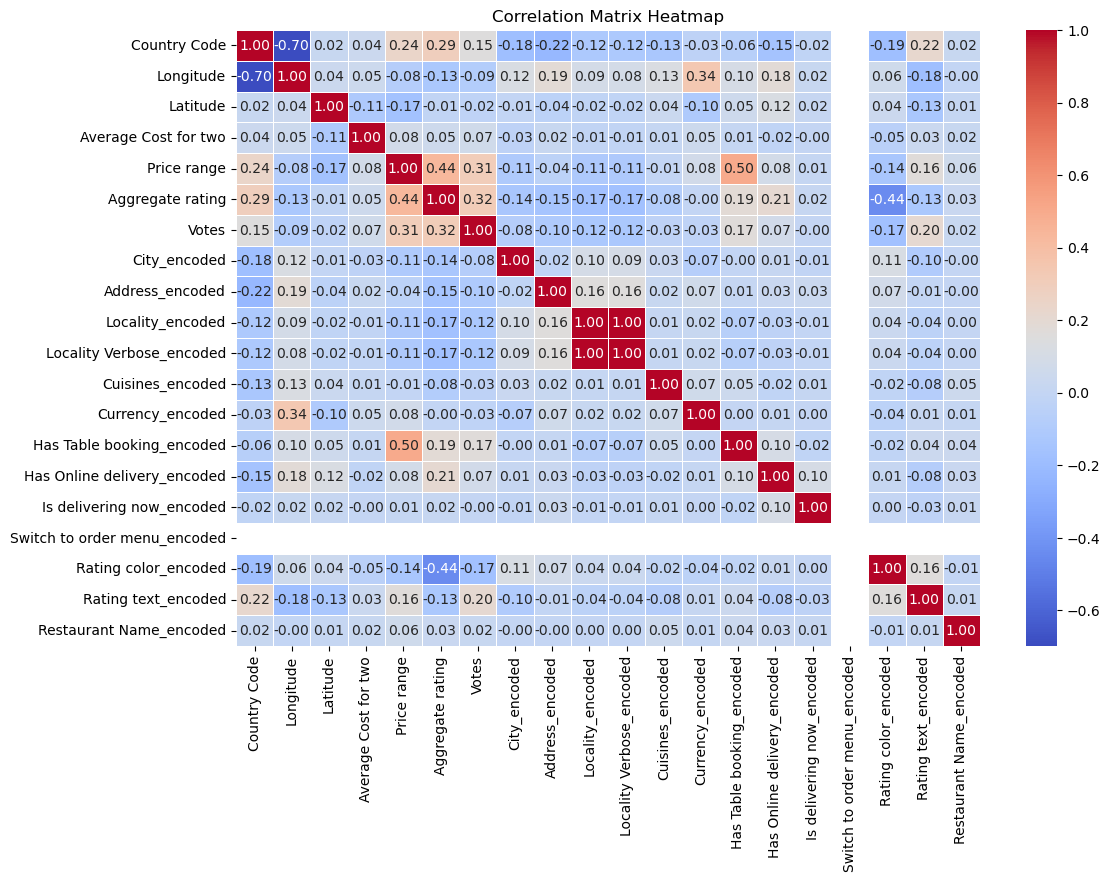

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_new is your DataFrame
# Calculate the correlation matrix
correlation_matrix = df_new.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Display the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()


# split data according to independent and dependent data 

In [111]:
X=df_new.drop(columns=['Restaurant Name_encoded'],axis=1)
y=df_new['Restaurant Name_encoded']


In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [114]:
models = {
#     'Logistic Regression': LogisticRegression(),
#     'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(n_estimators=30, random_state=42),
#     'Gradient Boosting': GradientBoostingClassifier(),
#     'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
#     'Neural Network': MLPClassifier()
}

In [115]:
for name,model  in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall=recall_score(y_test, y_pred, average='weighted', zero_division=0)
    F1_Score=f1_score(y_test, y_pred, average='weighted', zero_division=0)
    Confusion_Matrix=confusion_matrix(y_test,y_pred)
   
    
    # Print metrics
    print(f"=== {name} ===")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {F1_Score:.2f}")
    print(f"Confusion Matrix:\n{Confusion_Matrix}\n")

=== Decision Tree ===
Accuracy: 0.10
Precision: 0.10
Recall: 0.10
F1-score: 0.10
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

=== Naive Bayes ===
Accuracy: 0.08
Precision: 0.07
Recall: 0.08
F1-score: 0.07
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



# making predictions using MLPClassifier 

In [116]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report





# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=30, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.02


In [117]:
df.columns

Index(['Index', 'Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [118]:
df['City'].nunique()

141

In [119]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Country Code                  9551 non-null   int64
 1   Longitude                     9551 non-null   int32
 2   Latitude                      9551 non-null   int32
 3   Average Cost for two          9551 non-null   int64
 4   Price range                   9551 non-null   int64
 5   Aggregate rating              9551 non-null   int32
 6   Votes                         9551 non-null   int64
 7   City_encoded                  9551 non-null   int32
 8   Address_encoded               9551 non-null   int32
 9   Locality_encoded              9551 non-null   int32
 10  Locality Verbose_encoded      9551 non-null   int32
 11  Cuisines_encoded              9551 non-null   int32
 12  Currency_encoded              9551 non-null   int32
 13  Has Table booking_encoded     955

In [120]:
df.info(),df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Index                 9551 non-null   int64 
 1   Restaurant ID         9551 non-null   int64 
 2   Restaurant Name       9551 non-null   object
 3   Country Code          9551 non-null   int64 
 4   City                  9551 non-null   object
 5   Address               9551 non-null   object
 6   Locality              9551 non-null   object
 7   Locality Verbose      9551 non-null   object
 8   Longitude             9551 non-null   int32 
 9   Latitude              9551 non-null   int32 
 10  Cuisines              9551 non-null   object
 11  Average Cost for two  9551 non-null   int64 
 12  Currency              9551 non-null   object
 13  Has Table booking     9551 non-null   object
 14  Has Online delivery   9551 non-null   object
 15  Is delivering now     9551 non-null   

(None, None)

# Task 4

Objective: Perform a geographical analysis of the
restaurants in the dataset.

Steps:

Explore the latitude and longitude coordinates of
the restaurants and visualize their distribution on a
map.
Group the restaurants by city or locality and
analyze the concentration of restaurants in
different areas.
Calculate statistics such as the average ratings,
cuisines, or price ranges by city or locality.
Identify any interesting insights or patterns related
to the locations of the restaurants.

# Explore the latitude and longitude coordinates of the restaurants and visualize their distribution on a map

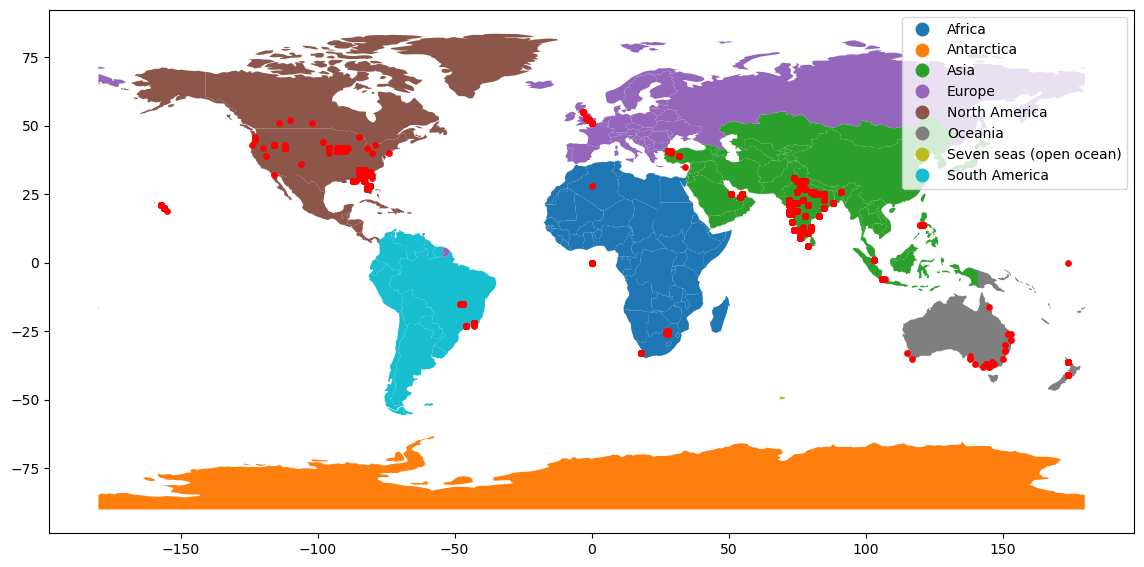

In [121]:
# Locations of restaurants on a map using latitude and longitude information
# Import the necessary libraries
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# Create Point geometry from latitude and longitude using Shapely
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.Longitude, df.Latitude)
)

# Create a base map of the world using Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a map that fits the screen and plots the restaurant locations
# The "continent" column is used for coloring and a legend is di splayed
gdf.plot(ax=world.plot("continent", legend = True, figsize=(14, 12)), marker='o', color='red', markersize=15)

# Show the map
plt.show()

# Group the restaurants by city or locality and analyze the concentration of restaurants in different areas.

In [122]:
df.head()

,Index,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0,6317637,Le Petit Souffle,162,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,121,14,...,Botswana PulaP,Yes,No,No,No,3,4,Dark Green,Excellent,314
1,1,6304287,Izakaya Kikufuji,162,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,121,14,...,Botswana PulaP,Yes,No,No,No,3,4,Dark Green,Excellent,591
2,2,6300002,Heat Edsa ShangriLa,162,Mandaluyong City,Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...,Edsa ShangriLa Ortigas Mandaluyong City,Edsa ShangriLa Ortigas Mandaluyong City Mandal...,121,14,...,Botswana PulaP,Yes,No,No,No,4,4,Green,Very Good,270
3,3,6318506,Ooma,162,Mandaluyong City,Third Floor Mega Fashion Hall SM Megamall Orti...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121,14,...,Botswana PulaP,No,No,No,No,4,4,Dark Green,Excellent,365
4,4,6314302,Sambo Kojin,162,Mandaluyong City,Third Floor Mega Atrium SM Megamall Ortigas Ma...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121,14,...,Botswana PulaP,Yes,No,No,No,4,4,Dark Green,Excellent,229


# analyze the concentration of restaurants in different areas.

In [123]:
restaurant_counts = df.groupby('City').size().reset_index(name='Restaurant Name')
restaurant_counts = restaurant_counts.sort_values(by='Restaurant Name', ascending=False)
restaurant_counts

,City,Restaurant Name
88,New Delhi,5473
50,Gurgaon,1118
89,Noida,1080
43,Faridabad,251
48,Ghaziabad,25
...,...,...
37,Dicky Beach,1
68,Lorn,1
107,Quezon City,1
66,Lincoln,1


In [124]:
restaurant_counts = df.groupby('Locality').size().reset_index(name='Restaurant Name')
restaurant_counts = restaurant_counts.sort_values(by='Restaurant Name', ascending=False)
restaurant_counts

,Locality,Restaurant Name
216,Connaught Place,122
835,Rajouri Garden,99
971,Shahdara,87
274,Defence Colony,86
794,Pitampura,85
...,...,...
796,Plaza Mall MG Road,1
385,Grovetown,1
798,Podanur,1
799,Pondok Aren,1


In [125]:
restaurant_counts = df.groupby('Country Code').size().reset_index(name='Restaurant Name')
restaurant_counts = restaurant_counts.sort_values(by='Restaurant Name', ascending=False)
restaurant_counts

,Country Code,Restaurant Name
0,1,8652
14,216,434
13,215,80
2,30,60
9,189,60
12,214,60
5,148,40
11,208,34
1,14,24
6,162,22


In [126]:
restaurant_counts = df.groupby(['Country Code','Has Table booking','Aggregate rating']).size().reset_index(name='Restaurant Name')
restaurant_counts = restaurant_counts.sort_values(by='Restaurant Name', ascending=False)
restaurant_counts

,Country Code,Has Table booking,Aggregate rating,Restaurant Name
3,1,No,3,3598
0,1,No,0,2092
2,1,No,2,1283
8,1,Yes,3,684
4,1,No,4,566
53,216,No,4,247
9,1,Yes,4,242
52,216,No,3,182
7,1,Yes,2,137
5,1,Yes,0,47


In [127]:
restaurant_counts = df.groupby(['Country Code','Has Table booking']).size().reset_index(name='Restaurant Name')
restaurant_counts = restaurant_counts.sort_values(by='Restaurant Name', ascending=False)
restaurant_counts

,Country Code,Has Table booking,Restaurant Name
0,1,No,7541
1,1,Yes,1111
20,216,No,434
18,215,No,68
3,30,No,60
12,189,No,58
16,214,No,42
6,148,No,40
15,208,No,34
2,14,No,24


In [128]:
restaurant_counts = df.groupby(['Locality','Has Table booking','Aggregate rating']).size().reset_index(name='Restaurant Name')
restaurant_counts = restaurant_counts.sort_values(by='Restaurant Name', ascending=False)
restaurant_counts

,Locality,Has Table booking,Aggregate rating,Restaurant Name
1229,Najafgarh,No,0,57
1124,Malviya Nagar,No,3,56
1409,Pitampura,No,3,54
329,Connaught Place,No,3,52
895,Kamla Nagar,No,3,51
...,...,...,...,...
972,K۱z۱lay,No,3,1
971,Kuvempunagar,No,3,1
970,Kuru_eme,No,4,1
969,Kuru_eme,No,3,1


In [129]:
restaurant_counts = df.groupby('Has Online delivery').size().reset_index(name='Restaurant Name')
restaurant_counts = restaurant_counts.sort_values(by='Restaurant Name', ascending=False)
restaurant_counts

,Has Online delivery,Restaurant Name
0,No,7100
1,Yes,2451


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Index                 9551 non-null   int64 
 1   Restaurant ID         9551 non-null   int64 
 2   Restaurant Name       9551 non-null   object
 3   Country Code          9551 non-null   int64 
 4   City                  9551 non-null   object
 5   Address               9551 non-null   object
 6   Locality              9551 non-null   object
 7   Locality Verbose      9551 non-null   object
 8   Longitude             9551 non-null   int32 
 9   Latitude              9551 non-null   int32 
 10  Cuisines              9551 non-null   object
 11  Average Cost for two  9551 non-null   int64 
 12  Currency              9551 non-null   object
 13  Has Table booking     9551 non-null   object
 14  Has Online delivery   9551 non-null   object
 15  Is delivering now     9551 non-null   

# Calculate statistics such as the average ratings, cuisines, or price ranges by city or locality.

In [131]:
restaurant_counts = df.groupby('City').size().reset_index(name='Aggregate rating')
restaurant_counts = restaurant_counts.sort_values(by='Aggregate rating', ascending=False)
restaurant_counts

,City,Aggregate rating
88,New Delhi,5473
50,Gurgaon,1118
89,Noida,1080
43,Faridabad,251
48,Ghaziabad,25
...,...,...
37,Dicky Beach,1
68,Lorn,1
107,Quezon City,1
66,Lincoln,1


In [132]:
restaurant_counts = df.groupby('Locality').size().reset_index(name='Aggregate rating')
restaurant_counts = restaurant_counts.sort_values(by='Aggregate rating', ascending=False)
restaurant_counts

,Locality,Aggregate rating
216,Connaught Place,122
835,Rajouri Garden,99
971,Shahdara,87
274,Defence Colony,86
794,Pitampura,85
...,...,...
796,Plaza Mall MG Road,1
385,Grovetown,1
798,Podanur,1
799,Pondok Aren,1


In [133]:
restaurant_counts = df.groupby('City').size().reset_index(name='Cuisines')
restaurant_counts = restaurant_counts.sort_values(by='Cuisines', ascending=False)
restaurant_counts


,City,Cuisines
88,New Delhi,5473
50,Gurgaon,1118
89,Noida,1080
43,Faridabad,251
48,Ghaziabad,25
...,...,...
37,Dicky Beach,1
68,Lorn,1
107,Quezon City,1
66,Lincoln,1


In [134]:
restaurant_counts = df.groupby('Locality').size().reset_index(name='Cuisines')
restaurant_counts = restaurant_counts.sort_values(by='Cuisines', ascending=False)
restaurant_counts

,Locality,Cuisines
216,Connaught Place,122
835,Rajouri Garden,99
971,Shahdara,87
274,Defence Colony,86
794,Pitampura,85
...,...,...
796,Plaza Mall MG Road,1
385,Grovetown,1
798,Podanur,1
799,Pondok Aren,1


In [135]:
restaurant_counts = df.groupby('City').size().reset_index(name='Price range')
restaurant_counts = restaurant_counts.sort_values(by='Price range', ascending=False)
restaurant_counts


,City,Price range
88,New Delhi,5473
50,Gurgaon,1118
89,Noida,1080
43,Faridabad,251
48,Ghaziabad,25
...,...,...
37,Dicky Beach,1
68,Lorn,1
107,Quezon City,1
66,Lincoln,1


In [136]:
restaurant_counts = df.groupby('Locality').size().reset_index(name='Price range')
restaurant_counts = restaurant_counts.sort_values(by='Price range', ascending=False)
restaurant_counts


,Locality,Price range
216,Connaught Place,122
835,Rajouri Garden,99
971,Shahdara,87
274,Defence Colony,86
794,Pitampura,85
...,...,...
796,Plaza Mall MG Road,1
385,Grovetown,1
798,Podanur,1
799,Pondok Aren,1


# Calculate statistics such as the average ratings, cuisines, or price ranges by city or locality.

In [154]:

average_rating_city = df.groupby('City')['Aggregate rating'].mean().reset_index()
print("\nAverage Rating by City:\n")
print(average_rating_city)


Average Rating by City:?

                City  Aggregate rating
0          Abu Dhabi          3.950000
1               Agra          3.500000
2          Ahmedabad          3.761905
3             Albany          3.000000
4          Allahabad          3.000000
..               ...               ...
136          Weirton          3.000000
137  Wellington City          3.950000
138   Winchester Bay          3.000000
139          Yorkton          3.000000
140          stanbul          3.857143

[141 rows x 2 columns]


In [156]:
# Count of cuisines by City
cuisine_count_city = df.groupby(['City', 'Cuisines']).size().reset_index(name='Count')
print("\nCount of Cuisines by City:")
print(cuisine_count_city)


Count of Cuisines by City:
           City                          Cuisines  Count
0     Abu Dhabi                          American      2
1     Abu Dhabi                 American Desserts      1
2     Abu Dhabi          American Mexican Seafood      1
3     Abu Dhabi                             Asian      1
4     Abu Dhabi                           Chinese      1
...         ...                               ...    ...
3026    stanbul                   Restaurant Cafe      2
3027    stanbul          Restaurant Cafe Desserts      1
3028    stanbul  Restaurant Cafe Turkish Desserts      1
3029    stanbul                           Turkish      1
3030    stanbul     World Cuisine Patisserie Cafe      1

[3031 rows x 3 columns]


In [161]:
# Count of cuisines by City
cuisine_count_city = df.groupby(['City'])['Cuisines'].size().reset_index(name='Count')
print("\nCount of Cuisines by City:")
print(cuisine_count_city)


Count of Cuisines by City:
                City  Count
0          Abu Dhabi     20
1               Agra     20
2          Ahmedabad     21
3             Albany     20
4          Allahabad     20
..               ...    ...
136          Weirton      1
137  Wellington City     20
138   Winchester Bay      1
139          Yorkton      1
140          stanbul     14

[141 rows x 2 columns]


In [158]:
average_price_range_city = df.groupby('City')['Price range'].mean().reset_index()
print("\nAverage Price Range by City:")
print(average_price_range_city)


Average Price Range by City:
                City  Price range
0          Abu Dhabi     3.300000
1               Agra     2.650000
2          Ahmedabad     2.571429
3             Albany     1.700000
4          Allahabad     2.650000
..               ...          ...
136          Weirton     2.000000
137  Wellington City     3.250000
138   Winchester Bay     2.000000
139          Yorkton     2.000000
140          stanbul     2.857143

[141 rows x 2 columns]


In [168]:
# Average rating by Locality


average_rating_locality = df.groupby('Locality')['Aggregate rating'].mean().reset_index()
print("\nAverage Rating by Locality:\n")
print(average_rating_locality)


Average Rating by Locality:

                                Locality  Aggregate rating
0       ILD Trade Centre Mall Sohna Road          2.500000
1     12th Square Building Banjara Hills          4.000000
2                   A Hotel Gurdev Nagar          3.000000
3                ARSS Mall Paschim Vihar          3.000000
4                             Aaya Nagar          0.000000
...                                  ...               ...
1203                              ayyolu          4.000000
1204                         guas Claras          3.333333
1205             ibis New Delhi Aerocity          1.500000
1206                              mitk_y          4.000000
1207                           ukurambar          3.000000

[1208 rows x 2 columns]


In [171]:
# Average rating by Locality


average_rating_locality = df.groupby('Locality')['Cuisines'].value_counts().reset_index()
print("\nAverage Rating by Locality:\n")
print(average_rating_locality)


Average Rating by Locality:

                                Locality  \
0       ILD Trade Centre Mall Sohna Road   
1       ILD Trade Centre Mall Sohna Road   
2     12th Square Building Banjara Hills   
3                   A Hotel Gurdev Nagar   
4                ARSS Mall Paschim Vihar   
...                                  ...   
7060                         guas Claras   
7061             ibis New Delhi Aerocity   
7062             ibis New Delhi Aerocity   
7063                              mitk_y   
7064                           ukurambar   

                                               Cuisines  count  
0                                        Cafe Beverages      1  
1                                  North Indian Mughlai      1  
2                          Mughlai North Indian Chinese      1  
3                        North Indian Chinese Fast Food      1  
4     North Indian South Indian Chinese Mithai Fast ...      1  
...                                                

In [163]:
# Average price range by Locality
average_price_range_locality = df.groupby('Locality')['Price range'].mean().reset_index()
print("\nAverage Price Range by Locality:")
print(average_price_range_locality)


Average Price Range by Locality:
                                Locality  Price range
0       ILD Trade Centre Mall Sohna Road     1.500000
1     12th Square Building Banjara Hills     3.000000
2                   A Hotel Gurdev Nagar     2.000000
3                ARSS Mall Paschim Vihar     2.000000
4                             Aaya Nagar     2.000000
...                                  ...          ...
1203                              ayyolu     2.000000
1204                         guas Claras     3.666667
1205             ibis New Delhi Aerocity     2.000000
1206                              mitk_y     3.000000
1207                           ukurambar     2.000000

[1208 rows x 2 columns]


# Identify any interesting insights or patterns related to the locations of the restaurants.

In [173]:
# 1. Cuisine Diversity by Location
cuisine_diversity = df.groupby('Locality')['Cuisines'].nunique().reset_index()
cuisine_diversity.columns = ['Locality', 'Unique Cuisines Count']
print("Cuisine Diversity by Location:")
print(cuisine_diversity)

Cuisine Diversity by Location:
                                Locality  Unique Cuisines Count
0       ILD Trade Centre Mall Sohna Road                      2
1     12th Square Building Banjara Hills                      1
2                   A Hotel Gurdev Nagar                      1
3                ARSS Mall Paschim Vihar                      1
4                             Aaya Nagar                      1
...                                  ...                    ...
1203                              ayyolu                      1
1204                         guas Claras                      3
1205             ibis New Delhi Aerocity                      2
1206                              mitk_y                      1
1207                           ukurambar                      1

[1208 rows x 2 columns]


In [178]:
# 2. Average Ratings by City
average_ratings_by_city = df.groupby('City')['Aggregate rating'].mean().reset_index()
print("\nAverage Ratings by City:")
print(average_ratings_by_city)



Average Ratings by City:
                City  Aggregate rating
0          Abu Dhabi          3.950000
1               Agra          3.500000
2          Ahmedabad          3.761905
3             Albany          3.000000
4          Allahabad          3.000000
..               ...               ...
136          Weirton          3.000000
137  Wellington City          3.950000
138   Winchester Bay          3.000000
139          Yorkton          3.000000
140          stanbul          3.857143

[141 rows x 2 columns]


In [177]:
# 3. Average Price Range by Locality
average_price_by_locality = df.groupby('Locality')['Price range'].mean().reset_index()
print("\nAverage Price Range by Locality:")
print(average_price_by_locality)


Average Price Range by Locality:
                                Locality  Price range
0       ILD Trade Centre Mall Sohna Road     1.500000
1     12th Square Building Banjara Hills     3.000000
2                   A Hotel Gurdev Nagar     2.000000
3                ARSS Mall Paschim Vihar     2.000000
4                             Aaya Nagar     2.000000
...                                  ...          ...
1203                              ayyolu     2.000000
1204                         guas Claras     3.666667
1205             ibis New Delhi Aerocity     2.000000
1206                              mitk_y     3.000000
1207                           ukurambar     2.000000

[1208 rows x 2 columns]


In [176]:
# 4. Restaurant Density by City
restaurant_density = df['City'].value_counts().reset_index()
restaurant_density.columns = ['City', 'Number of Restaurants']
print("\nRestaurant Density by City:")
print(restaurant_density)


Restaurant Density by City:
                 City  Number of Restaurants
0           New Delhi                   5473
1             Gurgaon                   1118
2               Noida                   1080
3           Faridabad                    251
4           Ghaziabad                     25
..                ...                    ...
136         Panchkula                      1
137         Mc Millan                      1
138          Mayfield                      1
139           Macedon                      1
140  Vineland Station                      1

[141 rows x 2 columns]


# Conclusion  for  Task 4----
In this analysis, I conducted a comprehensive geographical exploration of restaurant locations within the dataset. By examining latitude and longitude coordinates, I visualized the distribution of restaurants on a world map, which highlighted regional dining patterns. Grouping the data by city and locality allowed for an in-depth analysis of restaurant concentration in various areas. Furthermore, I calculated statistics such as average ratings, cuisines, and price ranges by city or locality, revealing trends in culinary diversity and pricing strategies across different regions. This geographical perspective not only enhances the understanding of restaurant distributions but also uncovers valuable insights into local dining preferences and market dynamics, paving the way for potential business opportunities and targeted marketing strategies.